# Finding the mean length of hospitals stay of patients

We have used Central Limit Theorem and worked witha population of 10000 and worked with 1000 samples of sample size 50.

Mean of Sample Means: 5.06 days
Standard Error of Sample Means: 0.02
95% Confidence Interval: (5.02, 5.09) days


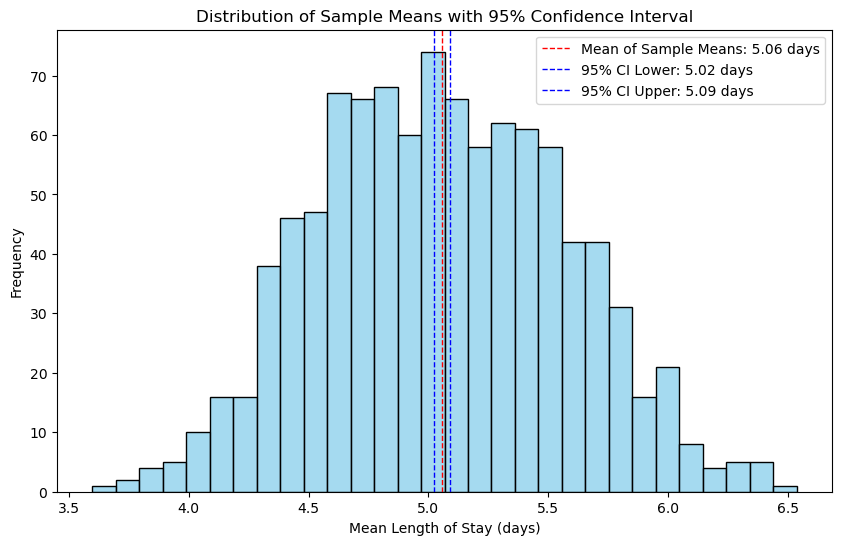

In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Function to take multiple samples and calculate their means
def sample_means(population, sample_size, num_samples):
    means = []
    for _ in range(num_samples):
        sample = np.random.choice(population, size=sample_size, replace=True)
        means.append(np.mean(sample))
    return means

# Generate a large population of lengths of stay with a skewed distribution
np.random.seed(42)  # For reproducibility
population = np.random.gamma(shape=2.0, scale=2.5, size=10000)

# Parameters
sample_size = 50
num_samples = 1000

# Calculate sample means
means = sample_means(population, sample_size, num_samples)

# Calculate overall mean and standard error of the sample means
overall_mean = np.mean(means)
overall_std = np.std(means, ddof=1)

# Define the confidence level
confidence_level = 0.95
alpha = 1 - confidence_level

# Calculate the critical value for a 95% confidence interval
z_critical = stats.norm.ppf(1 - alpha / 2)

# Calculate the margin of error
margin_of_error = z_critical * (overall_std / np.sqrt(num_samples))

# Calculate the confidence interval
confidence_interval = (overall_mean - margin_of_error, overall_mean + margin_of_error)

# Print the results
print(f"Mean of Sample Means: {overall_mean:.2f} days")
print(f"Standard Error of Sample Means: {overall_std / np.sqrt(num_samples):.2f}")
print(f"95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}) days")

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(means, bins=30, kde=False, color='skyblue', edgecolor='black')
plt.axvline(overall_mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean of Sample Means: {overall_mean:.2f} days')
plt.axvline(confidence_interval[0], color='blue', linestyle='dashed', linewidth=1, label=f'95% CI Lower: {confidence_interval[0]:.2f} days')
plt.axvline(confidence_interval[1], color='blue', linestyle='dashed', linewidth=1, label=f'95% CI Upper: {confidence_interval[1]:.2f} days')
plt.xlabel('Mean Length of Stay (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means with 95% Confidence Interval')
plt.legend()
plt.show()
